In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os

os.chdir('/home/brian/Documents/CPS/data/clean/')

In [8]:
df2000 = pd.read_feather('cps2000.ft')
df2018 = pd.read_feather('cps2017.ft').query('HRMONTH > 10').append(pd.read_feather('cps2018.ft'))

In [9]:
d = {}
for year, dfyear in [('2000', df2000), ('2018', df2018)]:
    df = dfyear
    grp = df[(df['PWORWGT'] > 0) & 
             (df['AGE'].between(25, 54)) & 
             (df['RHRWAGE'] > 0)]
    ed_lt15 = grp[(grp['RHRWAGE'] < 15) & 
                  (grp['EDUC'].isin(['SC', 'COLL', 'ADV']))]
    data_tot = (ed_lt15['PWORWGT'].sum() / grp['PWORWGT'].sum())
    dt = pd.Series({'INDGRP': '$\\bf{Total, \ all \ industries}$', 'PWORWGT': data_tot})
    data_ind = (ed_lt15.groupby(['INDGRP'])['PWORWGT'].sum() / 
                grp.groupby(['INDGRP'])['PWORWGT'].sum())
    d[year] = (data_ind.reset_index().append(dt, ignore_index=True)
                   .set_index('INDGRP').drop('Armed forces'))['PWORWGT']

data = pd.DataFrame(d).multiply(100).sort_values('2018').round(1)

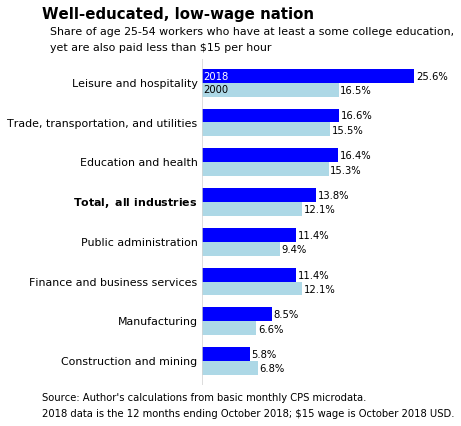

In [25]:
# horizontal bar plot
data.plot(kind='barh', figsize=(4,6), color=['lightblue', 'blue'], width=0.7, 
          legend=None)

# add value labels to ends of bars and country names to start of bars
for col in data.keys():
    for i, val in enumerate(data[col]):
        if col == '2000':
            y = i-0.18
            plt.text(-0.5, i-0.1, data.index[i], ha='right', fontsize=11)
        else:
            y = i+0.18
        plt.text(val+0.2, y-0.1, f'{val:.1f}%')
        
plt.axvline(x=0, color='lightgray')
plt.text(0.2, 6.75, '2000')
plt.text(0.2, 7.08, '2018', color='white')
# Text location
text_loc = (-data.max().max() * 0.75)

# add title and footer
plt.text(text_loc, 8.6, 'Well-educated, low-wage nation', 
          fontsize=15, weight='bold')
plt.text(text_loc+1, 8.2, "Share of age 25-54 workers who have at least a some college education,", 
          fontsize=11)
plt.text(text_loc+1, 7.8, 'yet are also paid less than $15 per hour', 
          fontsize=11)
plt.text(text_loc, -1, "Source: Author's calculations from basic monthly CPS microdata.")
plt.text(text_loc, -1.4, "2018 data is the 12 months ending October 2018; $15 wage is October 2018 USD.")

plt.axis('off')

plt.savefig('WellEducatedLowWage3.png', bbox_inches='tight')
plt.show()

In [17]:
(-data.max().max() * 0.8)

-20.480000000000004

In [165]:
[pd.read_feather(f'cps{year}.ft').query('FEMALE == 1 and 25 <= AGE <=54 and RHRWAGE > 0')['PWORWGT'].sum() for year in range(1994, 2019)]

[437381860.0,
 447501630.0,
 458041730.0,
 467320400.0,
 471822980.0,
 481021470.0,
 485881200.0,
 484141000.0,
 476691260.0,
 485071260.0,
 483315870.0,
 486919360.0,
 491687260.0,
 494752420.0,
 496466240.0,
 483320800.0,
 476770720.0,
 474709060.0,
 477032770.0,
 478624540.0,
 485097060.0,
 489959170.0,
 497927900.0,
 502725150.0,
 381784060.0]

In [54]:
pd.DataFrame()

KeyError: 'PWORGWGT'

In [46]:
data_ind.reset_index().append(pd.Series({'INDGRP': 'Total, all industries', 'PWORWGT': data_tot}), ignore_index=True).set_index('INDGRP').drop('Armed forces')

,PWORWGT
INDGRP,
Construction and mining,0.067435
Education and health,0.158066
Finance and business services,0.120751
Leisure and hospitality,0.174768
Manufacturing,0.067691
Public administration,0.092335
"Trade, transportation, and utilities",0.150438
"Total, all industries",0.122000


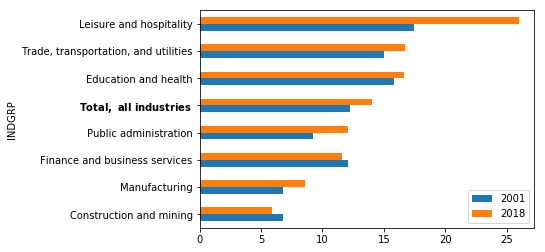

In [71]:
pd.DataFrame(d).multiply(100).sort_values('2018').plot(kind='barh')